In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('../../visualization_data/BrentOilPrices.csv')

In [93]:
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


In [100]:
def bop_data_reader(df):
    month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_dict = {month_list[m_idx]:m_idx+1 for m_idx in range(len(month_list))}

    dataset = []
    for data in np.array(df):
        price = data[-1]
        date = data[0]

        try:
            D, M, Y = date.split(sep='-')
            if int(Y) >= 87:
                M = month_dict[M]
                dataset.append([Y, M, D, price])
        except:
            pass
    dataset = np.array(dataset).astype(np.float)
    return dataset

In [95]:
def get_year_data(dataset, t_year):
    t_idx = np.where(dataset[:, 0] == t_year)
    t_data = dataset[t_idx]
    return t_data

In [101]:
dataset = bop_data_reader(df)
dataset

array([[87.  ,  5.  , 20.  , 18.63],
       [87.  ,  5.  , 21.  , 18.45],
       [87.  ,  5.  , 22.  , 18.55],
       ...,
       [99.  , 12.  , 23.  , 25.11],
       [99.  , 12.  , 29.  , 25.63],
       [99.  , 12.  , 30.  , 24.93]])

## Line plot Basics

### ax.plot(y)

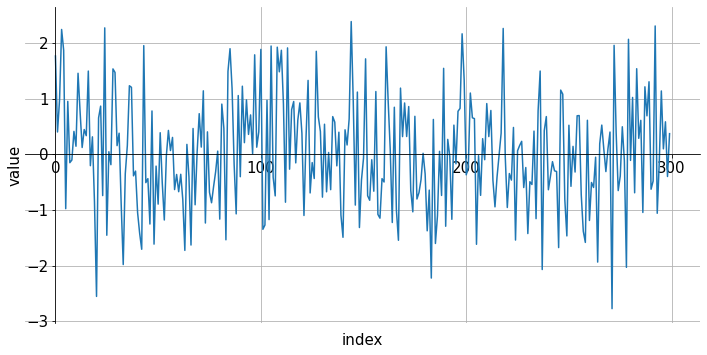

In [97]:
# example 1
y_data = np.random.normal(loc=0, scale=1, size=(300, ))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y_data)
ax.set_xticks(np.arange(301, step=100))
ax.set_title('index', fontsize=15, y=-0.05, va='top')
ax.set_ylabel('value', fontsize=15)
ax.tick_params(labelsize=15)
ax.grid()

for spine_loc, spine in ax.spines.items():
    if spine_loc in ['right', 'top']:
        spine.set_visible(False)
    if spine_loc in ['left', 'bottom']:
        spine.set_position(('data', 0))

fig.tight_layout()
plt.show()

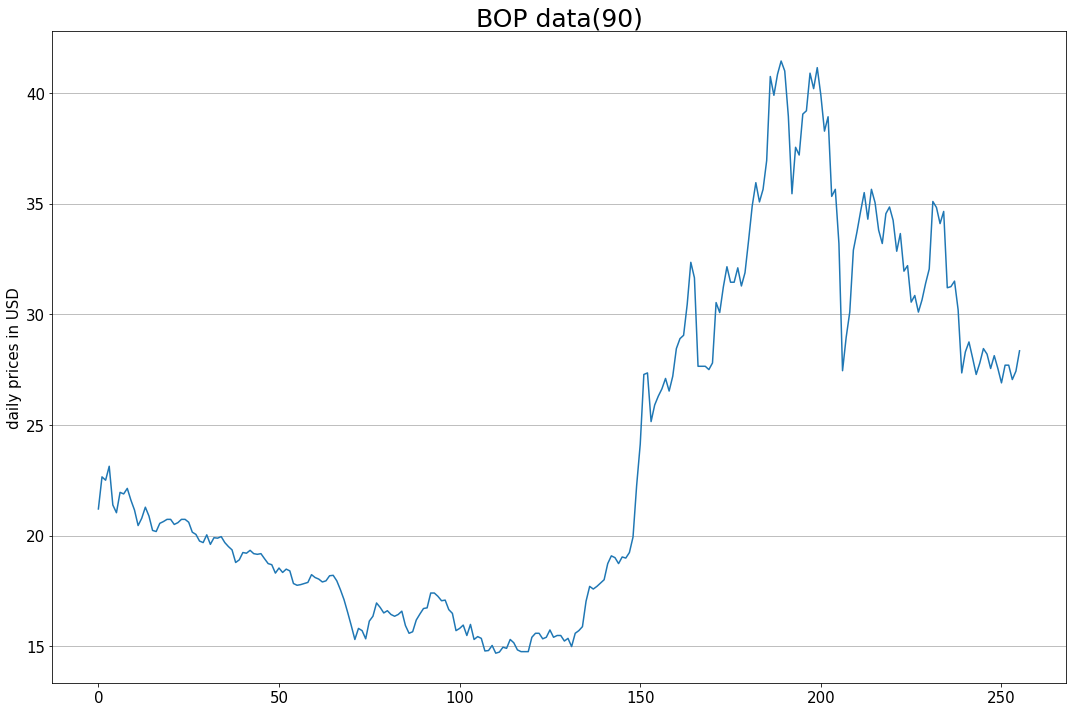

In [109]:
# BrentOilPrices data
t_year = 90
t_year_data = get_year_data(dataset, t_year)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t_year_data[:, -1])
ax.set_title(f"BOP data({t_year})", fontsize=25)
ax.set_ylabel('daily prices in USD', fontsize=15)
ax.tick_params(labelsize=15)
ax.grid(axis='y')

fig.tight_layout()
plt.show()

### ax.plot(x, y)

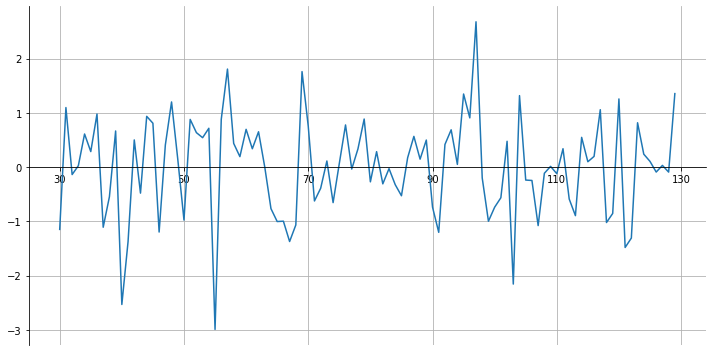

In [125]:
# example 1
n_data = 100
s_idx = 30
x_data = np.arange(s_idx, s_idx+n_data)
y_data = np.random.normal(0, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_data,  y_data)
ax.set_xticks(np.arange(s_idx, s_idx+n_data+1, 20))
ax.grid()

for spine_loc, spine in ax.spines.items():
    if spine_loc in ['right', 'top']:
        spine.set_visible(False)
    if spine_loc in ['bottom']:
        spine.set_position(('data', 0))

fig.tight_layout()
plt.show()

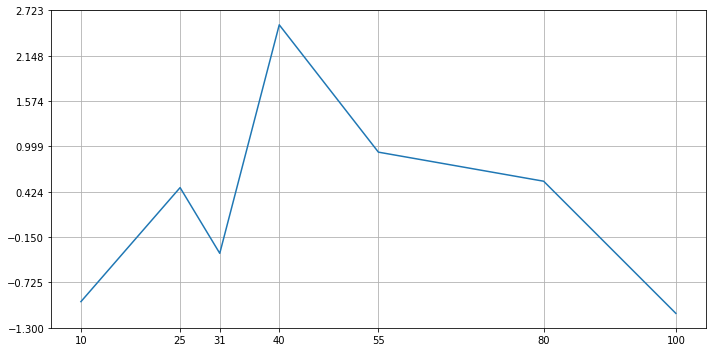

In [137]:
# example 2
x_data = np.array([10, 25, 31, 40, 55, 80, 100])
y_data = np.random.normal(0, 1, (7, ))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_data, y_data)
ax.set_xticks(x_data)
ylim = ax.get_ylim()
ax.set_yticks(np.linspace(ylim[0], ylim[1], 8))
ax.grid()

fig.tight_layout()
plt.show()

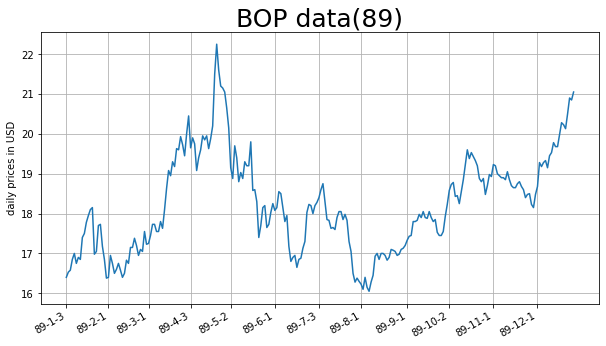

In [219]:
# BrentOilPrices data
t_year = 89
t_year_data = get_year_data(dataset, t_year)

month_start_dict = {m:None for m in range(1, 1+12)}
for data_idx, data in enumerate(t_year_data):
    (Y, M, D), price = data[0:3].astype(np.int), data[-1].astype(np.float)
    if month_start_dict[M] == None:
        month_start_dict[M] = [data_idx, '-'.join(str(i) for i in [Y, M, D])]
first_day_label = np.array(list(month_start_dict.values()))

fig,ax = plt.subplots(figsize=(10 , 5))
x_arange = np.arange(t_year_data.shape[0])
ax.plot(x_arange, t_year_data[:, -1])
ax.set_xticks(first_day_label[:, 0].astype(np.int))
ax.set_xticklabels(first_day_label[:, 1], ha='right', rotation=30)

ax.set_title(f"BOP data({t_year})", fontsize=25)
ax.set_ylabel('daily prices in USD')
ax.grid()

plt.show()

### Several Line Plots on One Ax

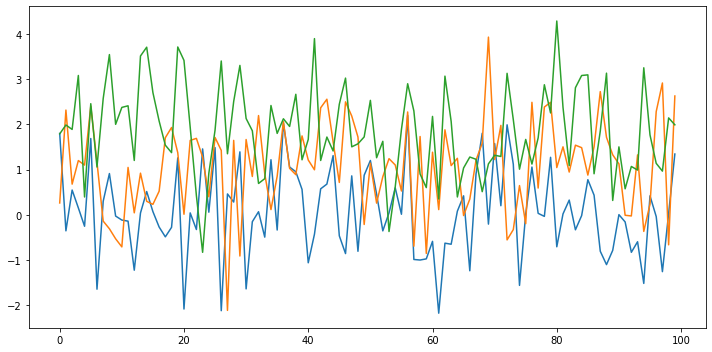

In [221]:
# example 1
n_data = 100

random_noise1 = np.random.normal(0, 1, (n_data, ))
random_noise2 = np.random.normal(1, 1, (n_data, ))
random_noise3 = np.random.normal(2, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(random_noise1)
ax.plot(random_noise2)
ax.plot(random_noise3)

fig.tight_layout()
plt.show()

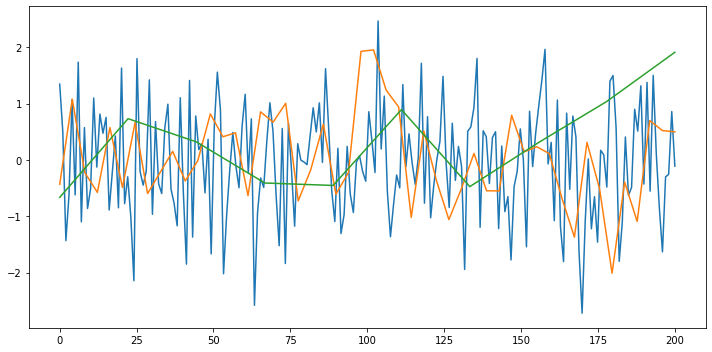

In [223]:
# example 2
n_data1, n_data2, n_data3 = 200, 50, 10

x_data1 = np.linspace(0, 200, n_data1)
x_data2 = np.linspace(0, 200, n_data2)
x_data3 = np.linspace(0, 200, n_data3)

random_noise1 = np.random.normal(0, 1, (n_data1, ))
random_noise2 = np.random.normal(0, 1, (n_data2, ))
random_noise3 = np.random.normal(0, 1, (n_data3, ))

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x_data1, random_noise1)
ax.plot(x_data2, random_noise2)
ax.plot(x_data3, random_noise3)

fig.tight_layout()
plt.show()

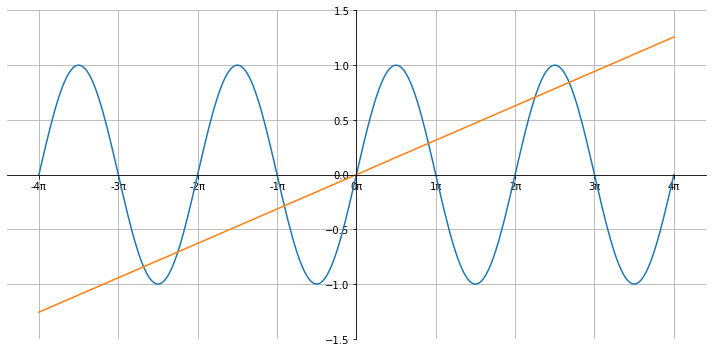

In [241]:
# example 3
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 300)
sin = np.sin(t)
linear = 0.1*t

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t, sin)
ax.plot(t, linear)
ax.grid()
ax.set_ylim([-1.5, 1.5])

x_ticks = np.arange(-4*PI, 4*PI+0.1, PI)
x_ticklabels = [str(i) + 'π' for i in range(-4, 5)]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

for spine_loc, spine in ax.spines.items():
    if spine_loc in ['top', 'right']:
        spine.set_visible(False)
    if spine_loc in ['left', 'bottom']:
        spine.set_position(('data', 0))

fig.tight_layout()
plt.show()

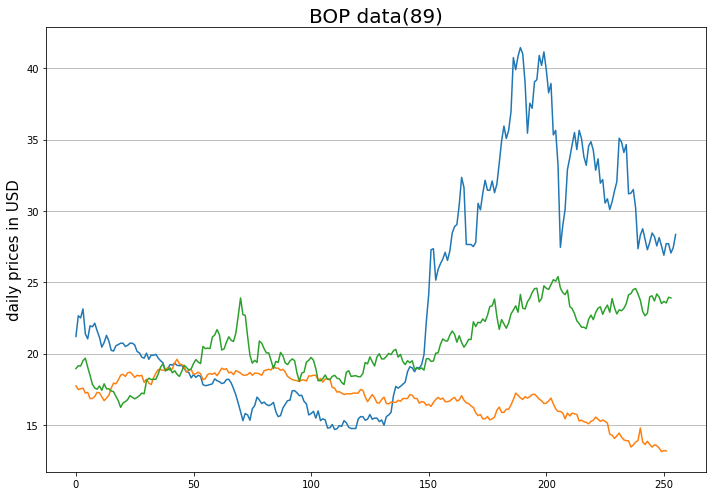

In [254]:
# BrentOilPrices data
def bop_plot(dataset, t_year, ax):
    t_year_data = get_year_data(dataset, t_year)
    ax.plot(t_year_data[:, -1])

fig, ax = plt.subplots(figsize=(10, 7))

bop_plot(dataset, 90, ax=ax)
bop_plot(dataset, 93, ax=ax)
bop_plot(dataset, 96, ax=ax)

ax.grid(axis='y')
ax.set_title(f"BOP data({t_year})", fontsize=20)
ax.set_ylabel('daily prices in USD', fontsize=15)

fig.tight_layout()
plt.show()

### Several Line Plots on Different Axes

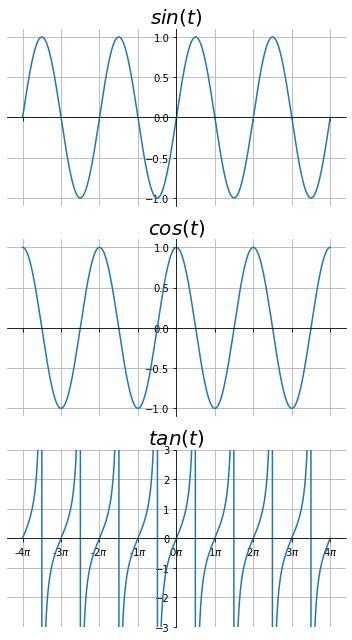

In [266]:
# example 1
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 1000)
sin = np.sin(t)
cos = np.cos(t)
tan = np.tan(t)
data = np.vstack([sin, cos, tan])

title_list = [r'$sin(t)$', r'$cos(t)$', r'$tan(t)$']
x_ticks = np.arange(-4*PI, 4*PI+0.1, PI)
x_ticklabels = [str(i) + r'$\pi$' for i in range(-4, 5)]

fig, axes = plt.subplots(3, 1, figsize=(5, 9), sharex=True)

for ax_idx, ax in enumerate(axes.flat):
    ax.plot(t, data[ax_idx])
    ax.set_title(title_list[ax_idx], fontsize=20)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticklabels)
    ax.grid()
    
    for spine_loc, spine in ax.spines.items():
        if spine_loc in ['top', 'right']:
            spine.set_visible(False)
        if spine_loc in ['left', 'bottom']:
            spine.set_position(('data', 0))
    
    if ax_idx == 2:
        ax.set_ylim([-3, 3])

axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels(x_ticklabels)
    
fig.tight_layout()
plt.show()

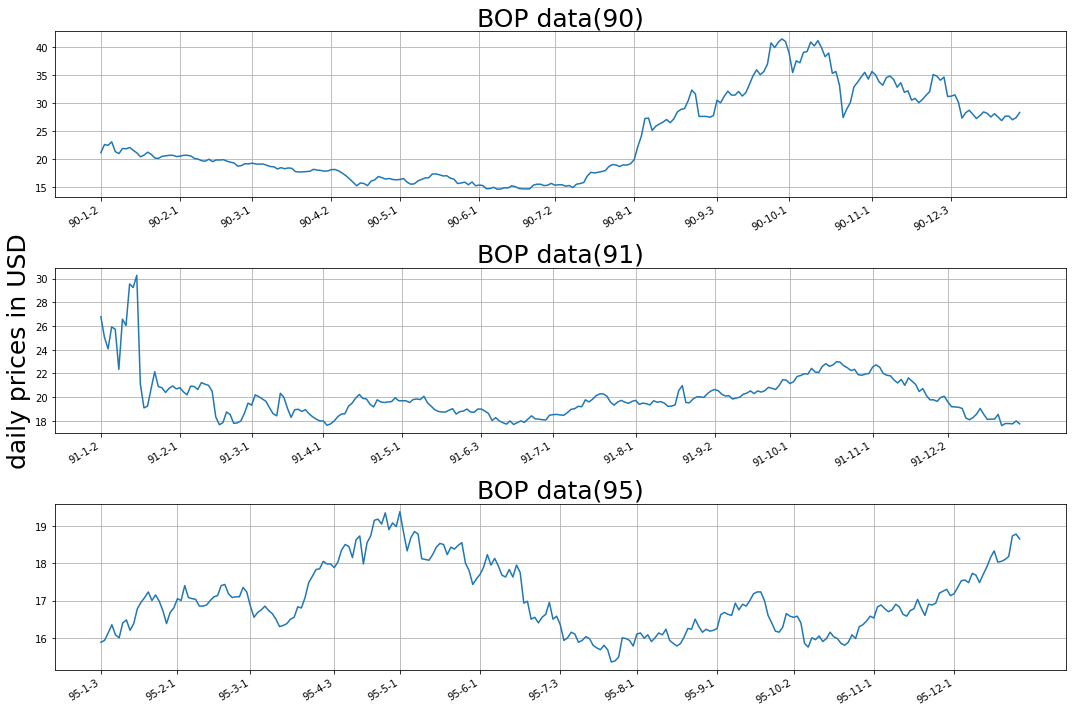

In [273]:
# BrentOilPrices data
def bop_plot(dataset, t_year, ax):
    t_year_data = get_year_data(dataset, t_year)
    
    month_start_dict = {m:None for m in range(1, 1+12)}
    for data_idx, data in enumerate(t_year_data):
        (Y, M, D), price = data[0:3].astype(np.int), data[-1].astype(np.float)
        if month_start_dict[M] == None:
            month_start_dict[M] = [data_idx, '-'.join(str(i) for i in [Y, M, D])]
    first_day_label = np.array(list(month_start_dict.values()))
    
    x_arange = np.arange(t_year_data.shape[0])
    ax.plot(x_arange, t_year_data[:, -1])
    ax.set_xticks(first_day_label[:, 0].astype(np.int))
    ax.set_xticklabels(first_day_label[:, 1], ha='right', rotation=30)
    ax.set_title(f"BOP data({t_year})", fontsize=25)
    ax.grid()

t_year_list = [90, 91, 95]
fig, axes = plt.subplots(len(t_year_list), 1, figsize=(15, 10))

for ax_idx, ax in enumerate(axes.flat):
    bop_plot(dataset, t_year_list[ax_idx], ax)
    
    if ax_idx ==1:
        ax.set_ylabel('daily prices in USD', fontsize=25)

fig.tight_layout()
plt.show()

### ax.axvline and ax.axhline

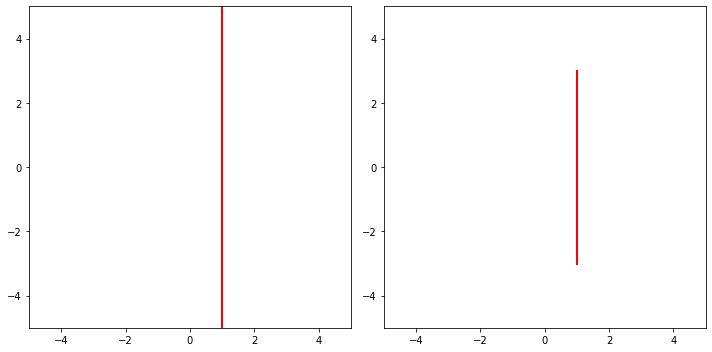

In [285]:
# ax.axvline
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_xlim([-5, 5])
axes[0].set_ylim([-5, 5])
axes[1].set_xlim([-5, 5])
axes[1].set_ylim([-5, 5])

axes[0].axvline(x=1, color='red', linewidth=2)
axes[1].axvline(x=1, ymin=0.2, ymax=0.8 ,color='red', linewidth=2)

fig.tight_layout()
plt.show()

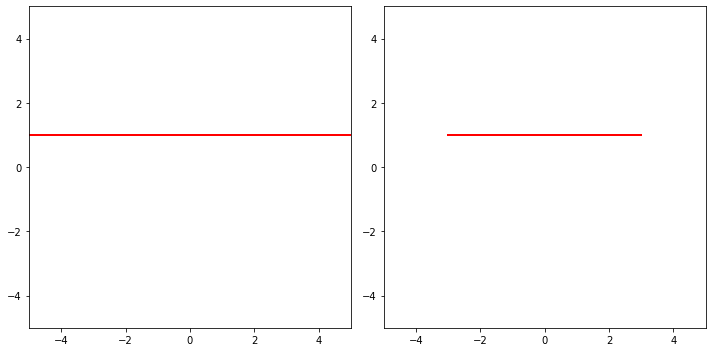

In [287]:
# ax.axhline
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_xlim([-5, 5])
axes[0].set_ylim([-5, 5])
axes[1].set_xlim([-5, 5])
axes[1].set_ylim([-5, 5])

axes[0].axhline(y=1, color='red', linewidth=2)
axes[1].axhline(y=1, xmin=0.2, xmax=0.8 ,color='red', linewidth=2)

fig.tight_layout()
plt.show()